# further statistical analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
data = pd.read_csv('/Users/julieagwu/Library/Mobile Documents/com~apple~CloudDocs/GB Power Market/Settlement Data/data/cleanedsettlement.csv')


In [49]:

data.head()

,SystemBuyPrice,NetImbalanceVolume,Date,Time
0,45.32,-140.641667,2024-09-09,00:00:00
1,60.12,-5.233333,2024-09-09,00:30:00
2,102.50,19.522222,2024-09-09,01:00:00
3,49.44,-87.358333,2024-09-09,01:30:00
4,104.00,263.658333,2024-09-09,02:00:00


In [24]:
from scipy.stats import skew, kurtosis

# your implementation of skew_kurtosis function
    #skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
    #kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable 
def skew_kurtosis(data):
    
    
    skewness = skew(data)
    kurt = kurtosis(data)
    print(f'Skewness: {skewness}')
    print(f'Kurtosis: {kurt}')
    return skewness, kurt

# your implementation of skew_kurtosis function in the skew_kurtosis_table
skew_kurtosis=  skew_kurtosis(data['SystemBuyPrice'])



Skewness: -0.6085086447589831
Kurtosis: -0.4731782162389999


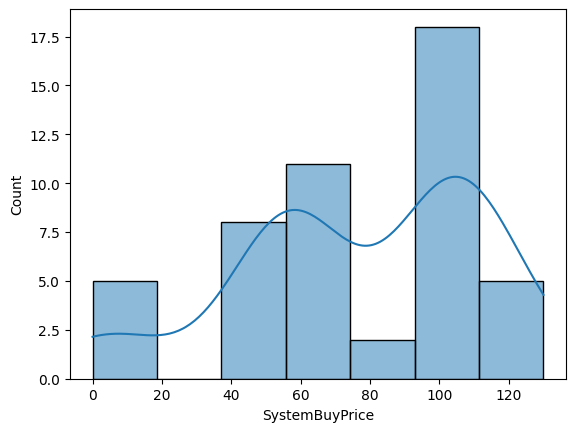

In [25]:
#cool graphics to display skewness and kurtosis using histplot and displot
sns.histplot(data['SystemBuyPrice'], kde=True)
plt.show()


In [50]:
correlation = data['SystemBuyPrice'].corr(data['NetImbalanceVolume'])
print(f"Correlation: {correlation}")

Correlation: 0.8469863495668117


# Identifying Outliers Spread

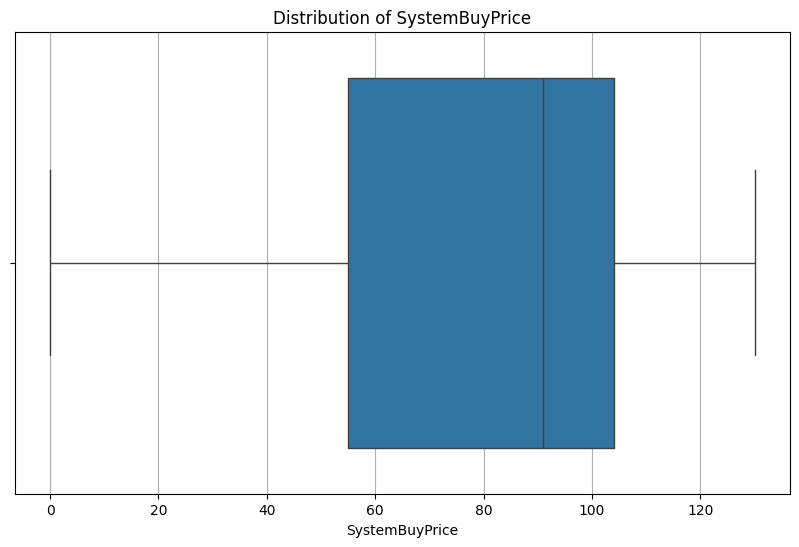

In [35]:
#boxplot to display the distribution of the SystemBuyPrice 
# Create a boxplot for the SystemBuyPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['SystemBuyPrice'])
plt.title('Distribution of SystemBuyPrice')
plt.xlabel('SystemBuyPrice')
plt.grid(axis='x')
plt.show()

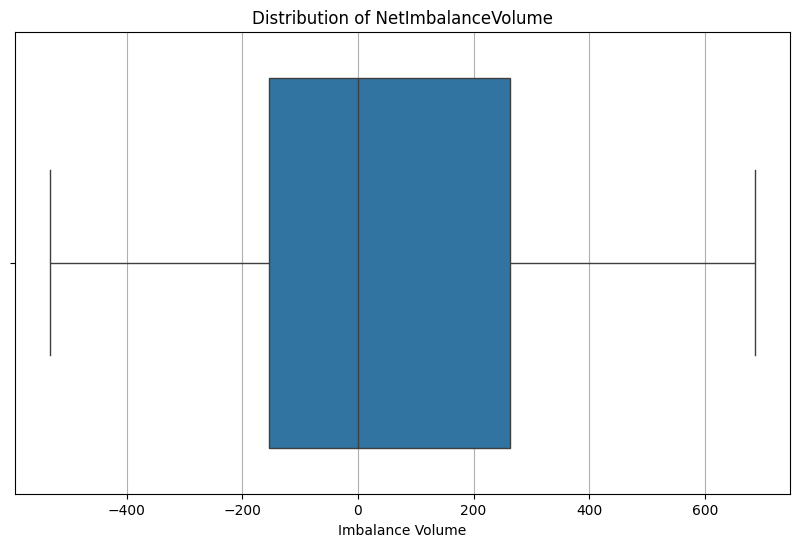

In [36]:
#boxplot to display the distribution of the SystemBuyPrice 
# Create a boxplot for the SystemBuyPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['NetImbalanceVolume'])
plt.title('Distribution of NetImbalanceVolume')
plt.xlabel('Imbalance Volume')
plt.grid(axis='x')
plt.show()

In [51]:
#what is the type of the data
data.dtypes

SystemBuyPrice        float64
NetImbalanceVolume    float64
Date                   object
Time                   object
dtype: object

# Analyse System Price 
## During the times 6am - 10am (morning ramp up)

In [55]:
# Convert 'Time' column to datetime type
data['Time'] = pd.to_datetime(data['Time'])

# Filter data for times between 6 AM and 10 AM
morning_data = data[(data['Time'].dt.hour >= 6) & (data['Time'].dt.hour < 10)]

# Descriptive statistics for SystemBuyPrice and NetImbalanceVolume
stats = morning_data[['SystemBuyPrice', 'NetImbalanceVolume']].describe()
print("Descriptive Statistics (6 AM to 10 AM):")
print(stats)


Descriptive Statistics (6 AM to 10 AM):
       SystemBuyPrice  NetImbalanceVolume
count        8.000000            8.000000
mean       100.715000          193.040928
std         23.440897          181.700630
min         65.010000          -13.530913
25%         94.000000           69.478330
50%        103.750000          187.021352
75%        119.505000          269.338098
max        125.150000          543.273914


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

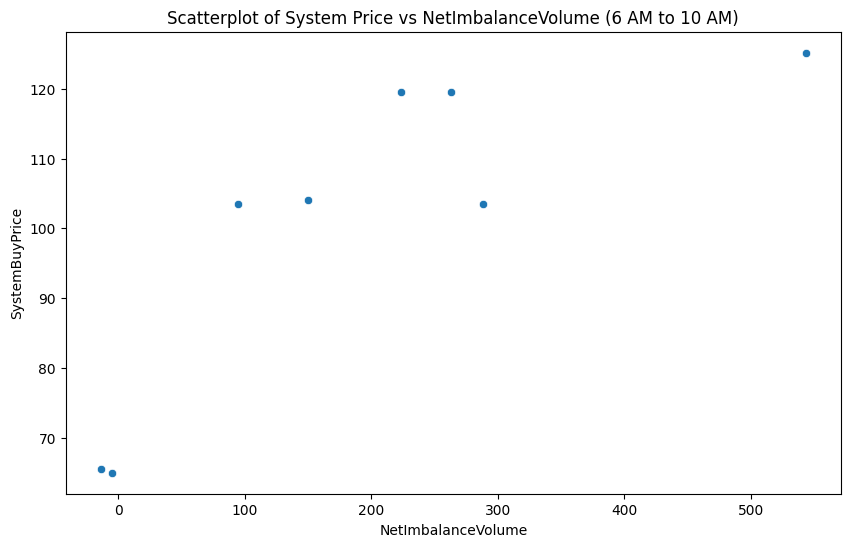

In [61]:
# Visualization: Scatterplot for SystemBuyPrice and NetImbalanceVolume
plt.figure(figsize=(10,6))
sns.scatterplot(data=morning_data, x='NetImbalanceVolume', y='SystemBuyPrice')
plt.title('Scatterplot of System Price vs NetImbalanceVolume (6 AM to 10 AM)')
plt.grid
